In [1]:
import numpy as np
import pandas as pd
import util
import ml_alg
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
train_path = 'dataSets/training/'
test_path = "dataSets/testing_phase1/"

In [3]:
train_df = pd.read_csv(train_path + 'data_2_0_final.csv', index_col=0)
test_df = pd.read_csv(test_path + 'data_2_0_final.csv', index_col=0)

In [4]:
y_train = train_df.pop('volume')
test_df.drop(['volume'], axis=1, inplace=True)

In [5]:
all_df = pd.concat((train_df, test_df), axis=0)

In [6]:
all_df.shape

(2172, 570)

In [7]:
all_df.head()

,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,dayofweek,hour,A2_1,...,vt0_1_0_11,vt0_1_1_11,vt0_2_0_11,vt0_3_0_11,vt0_3_1_11,vt1_1_0_11,vt1_1_1_11,vt1_2_0_11,vt1_3_0_11,vt1_3_1_11
time_window,,,,,,,,,,,,,,,,,,,,,
2016-09-19 00:00:00,1008.2,1013.2,329,2.8,22.2,76,0.0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-19 00:20:00,1008.2,1013.2,329,2.8,22.2,76,0.0,0,0,100.190000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-19 00:40:00,1008.2,1013.2,329,2.8,22.2,76,0.0,0,0,52.630000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-19 01:00:00,1008.2,1013.2,329,2.8,22.2,76,0.0,0,1,48.146667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-19 01:20:00,1008.2,1013.2,329,2.8,22.2,76,0.0,0,1,68.013478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
all_df.isnull().sum()

pressure           0
sea_pressure       0
wind_direction     0
wind_speed         0
temperature        0
rel_humidity       0
precipitation      0
dayofweek          0
hour               0
A2_1              71
A3_1              71
B1_1              71
B3_1              71
C1_1              71
C3_1              71
ve0_1_0_1         71
ve0_1_1_1         71
ve0_2_0_1         71
ve0_3_0_1         71
ve0_3_1_1         71
ve1_1_0_1         71
ve1_1_1_1         71
ve1_2_0_1         71
ve1_3_0_1         71
ve1_3_1_1         71
vm0_1_0_1         71
vm0_1_1_1         71
vm0_2_0_1         71
vm0_3_0_1         71
vm0_3_1_1         71
                  ..
vm1_1_0_11        81
vm1_1_1_11        81
vm1_2_0_11        81
vm1_3_0_11        81
vm1_3_1_11        81
vm2_1_0_11        81
vm2_1_1_11        81
vm2_2_0_11        81
vm2_3_0_11        81
vm2_3_1_11        81
vm3_1_0_11        81
vm3_1_1_11        81
vm3_2_0_11        81
vm3_3_0_11        81
vm3_3_1_11        81
volume_1_0_11     81
volume_1_1_11

In [9]:
all_df['dayofweek'].dtypes

dtype('int64')

In [10]:
dweek = pd.get_dummies(all_df['dayofweek'], prefix='dayofweek')

In [11]:
dhour = pd.get_dummies(all_df['hour'], prefix='hour')

In [12]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_col_means = all_df.loc[:, numeric_cols].mean()
numeric_col_std = all_df.loc[:, numeric_cols].std(ddof=0)
all_df.loc[:, numeric_cols] = (all_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [13]:
all_df.drop(['hour'], axis=1, inplace=True)
all_df.drop(['dayofweek'], axis=1, inplace=True)
all_df = pd.concat([all_df, dweek, dhour], axis=1)

In [14]:
all_df.isnull().sum()

pressure             0
sea_pressure         0
wind_direction       0
wind_speed           0
temperature          0
rel_humidity         0
precipitation        0
A2_1                71
A3_1                71
B1_1                71
B3_1                71
C1_1                71
C3_1                71
ve0_1_0_1           71
ve0_1_1_1           71
ve0_2_0_1           71
ve0_3_0_1           71
ve0_3_1_1           71
ve1_1_0_1           71
ve1_1_1_1           71
ve1_2_0_1           71
ve1_3_0_1           71
ve1_3_1_1           71
vm0_1_0_1           71
vm0_1_1_1         2172
vm0_2_0_1           71
vm0_3_0_1           71
vm0_3_1_1         2172
vm1_1_0_1           71
vm1_1_1_1           71
                  ... 
volume_2_0_11       81
volume_3_0_11       81
volume_3_1_11       81
vt0_1_0_11        2172
vt0_1_1_11          81
vt0_2_0_11        2172
vt0_3_0_11        2172
vt0_3_1_11          81
vt1_1_0_11        2172
vt1_1_1_11          81
vt1_2_0_11        2172
vt1_3_0_11        2172
vt1_3_1_11 

# Training want to predict 8:00 - 8:20

In [15]:
dummy_train_df = all_df.loc[train_df.index]
dummy_test_df = all_df.loc[test_df.index]

In [16]:
dummy_train_df_1 = dummy_train_df.ix['2016-09-19 02:00:00':]

In [17]:
dummy_train_df_1 = dummy_train_df_1.dropna(axis = 1)

In [18]:
y_train1 = y_train.ix['2016-09-19 02:00:00':]

In [19]:
X_train = dummy_train_df_1.values
X_test = dummy_test_df.values

## Try ridge regression as baseline. 

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import time

### As MAPE is not listed in sklearn. Write my own metric. 

In [24]:
from sklearn.metrics import make_scorer
def MAPE(ground_truth, predictions):
    ground_truth[ground_truth == 0] = math.inf
    diff = np.abs((ground_truth - predictions)/ground_truth).mean()
    return diff

loss  = make_scorer(MAPE, greater_is_better=False)

In [22]:
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    start_time = time.time()
    clf = Ridge(alpha)
    test_score = -cross_val_score(clf, X_train, y_train1, cv=10, scoring=loss).mean()
    test_scores.append(test_score)
    print("alpha:" + str(alpha) + " loss = " + str(test_score))
    print("time:" + str(time.time() - start_time))

alpha:0.001 loss = 0.601888618606
time:0.25409483909606934
alpha:0.00126485521686 loss = 0.601875432718
time:0.1864309310913086
alpha:0.00159985871961 loss = 0.601858907628
time:0.18918991088867188
alpha:0.00202358964773 loss = 0.601838257784
time:0.17892098426818848
alpha:0.0025595479227 loss = 0.601812523843
time:0.1809859275817871
alpha:0.00323745754282 loss = 0.601780557961
time:0.1822521686553955
alpha:0.00409491506238 loss = 0.601741026555
time:0.19357991218566895
alpha:0.00517947467923 loss = 0.601692402551
time:0.17324209213256836
alpha:0.0065512855686 loss = 0.601632983685
time:0.17615509033203125
alpha:0.00828642772855 loss = 0.601560936853
time:0.1721341609954834
alpha:0.0104811313415 loss = 0.601474374609
time:0.18620991706848145
alpha:0.0132571136559 loss = 0.601371465065
time:0.1789078712463379
alpha:0.0167683293681 loss = 0.601254595557
time:0.1765749454498291
alpha:0.0212095088792 loss = 0.601122807966
time:0.17504310607910156
alpha:0.0268269579528 loss = 0.600971729228

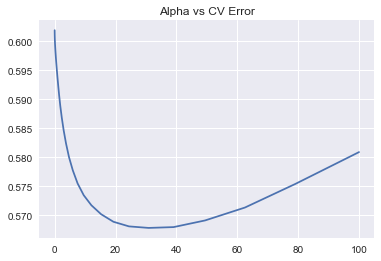

In [23]:
plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

In [24]:
np.argmin(test_scores)

44

In [25]:
#baseline model
alpha = alphas[44]
clf = Ridge(alpha)

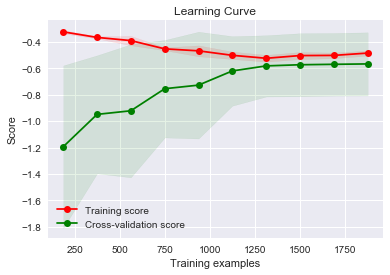

In [26]:
util.plot_learning_curve(clf, X_train, y_train1, cv=10, scoring = loss, ylim=None,
                        train_sizes=np.linspace(.1, 1.0, 10))

### Underfit. Should use more flex model. 

In [27]:
X_train.shape

(2082, 282)

## Random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    start_time = time.time()
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = -cross_val_score(clf, X_train, y_train1, cv=5, scoring=loss).mean()
    test_scores.append(test_score)
    print("max_feat:" + str(max_feat) + " loss = " + str(test_score))
    print("time:" + str(time.time() - start_time))

max_feat:0.1 loss = 0.39795917625
time:17.66840696334839
max_feat:0.3 loss = 0.367592704092
time:49.38841104507446
max_feat:0.5 loss = 0.371620596208
time:77.82065606117249
max_feat:0.7 loss = 0.375728150662
time:106.11003494262695
max_feat:0.9 loss = 0.379324241197
time:135.00751900672913
max_feat:0.99 loss = 0.376273059141
time:147.93540906906128


In [41]:
clf = RandomForestRegressor(n_estimators=300, min_samples_leaf = 10, max_features=0.3)
clf.fit(X_train, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

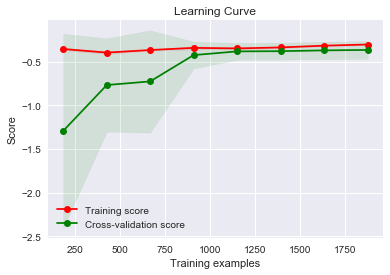

In [42]:
util.plot_learning_curve(clf, X_train, y_train1, cv=10, scoring = loss, ylim=None,
                        train_sizes=np.linspace(.1, 1.0, 8))

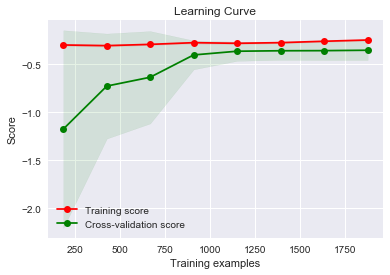

In [43]:
clf = RandomForestRegressor(n_estimators=300, min_samples_leaf = 10, max_features=0.3)
util.plot_learning_curve(clf, X_train, y_train1, cv=10, scoring = loss, ylim=None,
                        train_sizes=np.linspace(.1, 1.0, 8))

In [22]:
from xgboost import XGBRegressor

/Users/Solomon/anaconda3/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
params = [1,2,3,4,5,6, 7, 8, 9, 10, 11, 12,13,14,15]
test_scores = []
for param in params:
    start_time = time.time()
    clf = XGBRegressor(max_depth=param)
    test_score = -cross_val_score(clf, X_train, y_train1, cv=10, scoring=loss).mean()
    test_scores.append(test_scores)
    print("param:" + str(param) + " loss = " + str(test_score))
    print("time:" + str(time.time() - start_time))

param:1 loss = 0.446444931566
time:1.7979910373687744
param:2 loss = 0.406419789762
time:2.7637979984283447
param:3 loss = 0.377154533568
time:3.5849790573120117
param:4 loss = 0.36320446474
time:5.131049871444702
param:5 loss = 0.364182664485
time:7.123805046081543
param:6 loss = 0.35864397275
time:9.890104055404663
param:7 loss = 0.362751522574
time:12.343939065933228
param:8 loss = 0.370358726672
time:14.91746997833252
param:9 loss = 0.37925393236
time:19.01983880996704
param:10 loss = 0.39166059561
time:19.70253300666809
param:11 loss = 0.385426927736
time:20.584470987319946
param:12 loss = 0.388075864532
time:22.3659029006958
param:13 loss = 0.387714188371
time:23.63110613822937
param:14 loss = 0.394171920356
time:25.51936101913452
param:15 loss = 0.392457097603
time:26.998738050460815


In [37]:
test_df.ix.hour

AttributeError: '_IXIndexer' object has no attribute 'hour'

In [38]:
test_df.ix[['2016-10-18 08:00:00', '2016-10-18 08:20:00']]

,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,dayofweek,hour,A2_1,...,vt0_1_0_11,vt0_1_1_11,vt0_2_0_11,vt0_3_0_11,vt0_3_1_11,vt1_1_0_11,vt1_1_1_11,vt1_2_0_11,vt1_3_0_11,vt1_3_1_11
time_window,,,,,,,,,,,,,,,,,,,,,
2016-10-18 08:00:00,1012.5,1017.5,128,1.6,23.4,73,0.0,0,8,63.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-18 08:20:00,1012.5,1017.5,128,1.6,23.4,73,0.0,0,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
test_df.index.values

array(['2016-10-18 08:00:00', '2016-10-18 08:20:00', '2016-10-18 08:40:00',
       '2016-10-18 09:00:00', '2016-10-18 09:20:00', '2016-10-18 09:40:00',
       '2016-10-18 17:00:00', '2016-10-18 17:20:00', '2016-10-18 17:40:00',
       '2016-10-18 18:00:00', '2016-10-18 18:20:00', '2016-10-18 18:40:00',
       '2016-10-19 08:00:00', '2016-10-19 08:20:00', '2016-10-19 08:40:00',
       '2016-10-19 09:00:00', '2016-10-19 09:20:00', '2016-10-19 09:40:00',
       '2016-10-19 17:00:00', '2016-10-19 17:20:00', '2016-10-19 17:40:00',
       '2016-10-19 18:00:00', '2016-10-19 18:20:00', '2016-10-19 18:40:00',
       '2016-10-20 08:00:00', '2016-10-20 08:20:00', '2016-10-20 08:40:00',
       '2016-10-20 09:00:00', '2016-10-20 09:20:00', '2016-10-20 09:40:00',
       '2016-10-20 17:00:00', '2016-10-20 17:20:00', '2016-10-20 17:40:00',
       '2016-10-20 18:00:00', '2016-10-20 18:20:00', '2016-10-20 18:40:00',
       '2016-10-21 08:00:00', '2016-10-21 08:20:00', '2016-10-21 08:40:00',
       '2016